In [1]:
# 必要なモジュールと自作魔法集の読み込み
import numpy as np
import matplotlib.pyplot as plt

import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable, Chain, config

import princess_nogpu as ohm

In [2]:
# 等間隔の数値を用意する
D = 100
ndata = np.linspace(-5.0, 5.0, D)

In [3]:
# 関数で適当なデータを作る
N = 1
xdata = ndata.reshape(D,N).astype(np.float32)
tdata = (np.sin(ndata) + np.sin(2.0*ndata)).reshape(D,N).astype(np.float32)

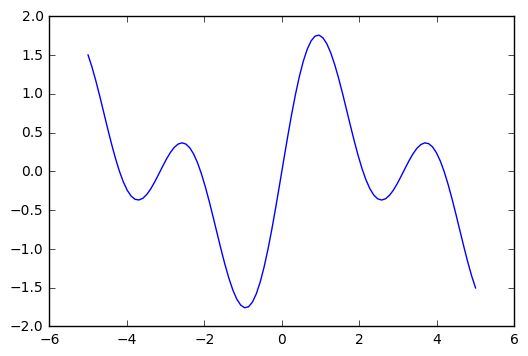

In [4]:
# 関数の図示
plt.plot(xdata, tdata)
plt.show()

In [5]:
# 回帰のニューラルネットワークを呼び出して関数化
# C = 1
# H = 20
# NN = Chain(l1=L.Linear(N, H), l2=L.Linear(H,C), bnorm1=L.BatchNormalization(H))

C = 1
H1 = 5
H2 = 5
H3 = 5
layers = {}
layers["l1"] = L.Linear(N, H1)
layers["l2"] = L.Linear(H1, H2)
layers["l3"] = L.Linear(H2, H3)
layers["l4"] = L.Linear(H3, C)
layers["bnorm1"] = L.BatchNormalization(H1)
layers["bnorm2"] = L.BatchNormalization(H2)
layers["bnorm3"] = L.BatchNormalization(H3)
NN = Chain(**layers)

"""
def model(x):
    h = NN.l1(x)
#    h = F.relu(h)
#    h = F.sigmoid(h)
    h = F.sin(h)
    h = NN.bnorm1(h)
    y = NN.l2(h)
    return y
"""

def model(x):
    h = NN.l1(x)
    h = F.relu(h)
    h = NN.bnorm1(h)
    h = NN.l2(h)
    h = F.relu(h)
    h = NN.bnorm2(h)
    h = NN.l3(h)
    h = F.relu(h)
    h = NN.bnorm3(h)
    y = NN.l4(h)
    return y

In [6]:
# ニューラルネットワークの状態を調べる
print(NN.l1.W.data)

[[-1.0836734 ]
 [-0.19541943]
 [ 0.43516952]
 [ 0.2122882 ]
 [-0.30898005]]


In [7]:
print(NN.l1.W.grad)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [8]:
# 最適化手法の選択
optNN = Opt.MomentumSGD()
optNN.setup(NN)

In [9]:
# 回帰用の学習記録を残す場所の用意, データの分割
train_loss=[]
test_loss=[]

Dtrain = D//2
xtrain, xtest, ttrain, ttest = ohm.data_divide(Dtrain, D, xdata, tdata)
data = [xtrain, xtest, ttrain, ttest]
result = [train_loss, test_loss]

In [10]:
# 自作関数で回帰用の結果を張る
ohm.learning_regression(model, optNN, data, result, 1000)

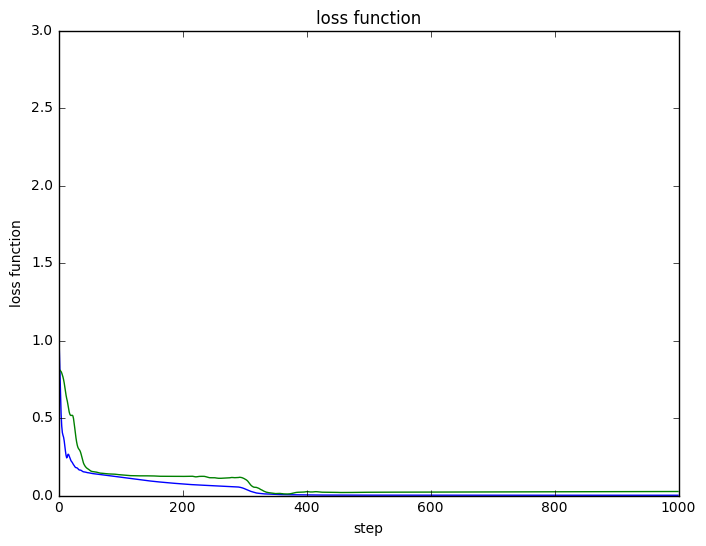

In [11]:
# 誤差関数の比較
ohm.plot_result2(result[0], result[1], "loss function", "step", "loss function", 0.0, 3.0)

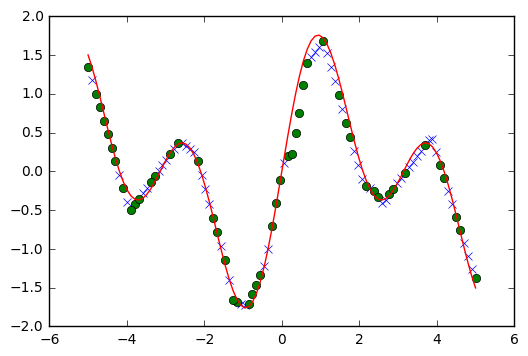

In [12]:
# 回帰の結果を比較する
config.train = False
ytrain = model(xtrain).data
ytest = model(xtest).data
plt.plot(xtrain, ytrain, marker="x", linestyle="None")
plt.plot(xtest, ytest, marker="o", linestyle="None")
plt.plot(xdata, tdata)
plt.show()